In [88]:
from peloton import PelotonWorkout
import numpy as np
import pandas as pd
from fetch_data import get_all_workout_data

In [2]:
# play with just one workout
workouts = PelotonWorkout.list()
workout = workouts[0]
variables = ['start_time', 'fitness_discipline', 'title', 'duration', 'instructor', 'calories', 'distance', 'avg_hr']
wkout = workout.__dict__
start_time = wkout['start_time']
workout_type = wkout['fitness_discipline']
workout_deets = wkout['ride'].__dict__
title = workout_deets['title']
duration = workout_deets['duration']
instructor = workout_deets['instructor'].name
cals = (workout.metrics.calories_summary.__dict__)['value']
dist = (workout.metrics.distance_summary.__dict__)['value']
avg_hr = workout.metrics.heart_rate.average
print([start_time, workout_type, title, duration, instructor, cals, dist, avg_hr])

[datetime.datetime(2021, 8, 2, 18, 3, 24, tzinfo=datetime.timezone.utc), 'running', '30 min J Balvin Run', 1800, 'Robin Arzón', 315, 3.28, 169]


In [3]:
df = get_all_workout_data()
df.to_csv('workout_data.csv', index=False)

In [87]:
!pip install --upgrade pandas==1.1.0

     |████████████████████████████████| 10.4 MB 2.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import datetime

In [108]:
df = pd.read_csv('workout_data.csv', parse_dates=['timestamp'])
df.head()

,timestamp,fitness_discipline,title,duration,instructor,calories,distance,avg_hr
0,2021-08-02 18:03:24+00:00,running,30 min J Balvin Run,1800,Robin Arzón,315,3.28,169
1,2021-08-01 15:44:11+00:00,running,45 min Endurance Run,2700,Becs Gentry,420,4.92,172
2,2021-07-30 17:12:49+00:00,running,30 min Tropical House Run,1800,Selena Samuela,334,3.28,173
3,2021-07-29 13:21:49+00:00,running,30 min Intervals Run,1800,Becs Gentry,346,3.39,174
4,2021-07-22 18:59:52+00:00,running,20 min Intervals Run,1200,Chase Tucker,61,0.66,150


In [109]:
# creating new datetime-based features
df['year'] = df.timestamp.dt.year
df['month'] = df.timestamp.dt.month
df['weekday'] = df.timestamp.dt.day_name()

mapping = {k: v for k, v in zip(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [i+1 for i in range(7)])}
df['weekday_num'] = df['weekday'].apply(lambda x: mapping[x])
df

,timestamp,fitness_discipline,title,duration,instructor,calories,distance,avg_hr,year,month,weekday,weekday_num
0,2021-08-02 18:03:24+00:00,running,30 min J Balvin Run,1800,Robin Arzón,315,3.28,169,2021,8,Monday,1
1,2021-08-01 15:44:11+00:00,running,45 min Endurance Run,2700,Becs Gentry,420,4.92,172,2021,8,Sunday,7
2,2021-07-30 17:12:49+00:00,running,30 min Tropical House Run,1800,Selena Samuela,334,3.28,173,2021,7,Friday,5
3,2021-07-29 13:21:49+00:00,running,30 min Intervals Run,1800,Becs Gentry,346,3.39,174,2021,7,Thursday,4
4,2021-07-22 18:59:52+00:00,running,20 min Intervals Run,1200,Chase Tucker,61,0.66,150,2021,7,Thursday,4
...,...,...,...,...,...,...,...,...,...,...,...,...
78,2021-02-06 16:20:28+00:00,running,30 min Pop Run,1800,Jess Sims,565,3.22,168,2021,2,Saturday,6
79,2021-02-03 17:25:54+00:00,running,20 min Intervals Run,1200,Olivia Amato,165,1.33,130,2021,2,Wednesday,3
80,2021-02-03 16:59:34+00:00,running,20 min HIIT Run,1200,Adrian Williams,185,1.67,150,2021,2,Wednesday,3
81,2021-01-31 19:24:50+00:00,running,10 min Long Run Warm Up,600,Robin Arzón,111,1.09,175,2021,1,Sunday,7


In [110]:
df['week_num'] = df['timestamp'].apply(lambda x: x.isocalendar()[1])

In [113]:
data_2021 = df[df['year'] == 2021]
data_2021 = data_2021[['week_num', 'weekday_num', 'distance']]
pivoted_data = pd.pivot_table(data_2021, values='distance', index=['weekday_num'], columns=['week_num'], aggfunc=np.mean)
pivoted_data

week_num,4,5,6,7,8,9,10,11,12,13,...,19,22,23,24,25,27,28,29,30,31
weekday_num,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,5.12,3.46,2.94,3.49,3.33,3.46,...,3.36,NaN,3.17,NaN,3.42,NaN,NaN,5.06,NaN,3.28
2,NaN,NaN,NaN,3.38,NaN,NaN,NaN,3.36,NaN,NaN,...,3.25,3.29,3.28,3.39,2.32,2.090,6.87,NaN,NaN,NaN
3,NaN,1.50,NaN,NaN,3.46,NaN,3.37,3.24,NaN,5.22,...,3.34,3.24,2.28,3.37,NaN,3.240,NaN,5.17,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,3.42,NaN,2.96,NaN,...,2.10,NaN,NaN,NaN,5.07,NaN,3.43,0.66,3.39,NaN
5,NaN,NaN,2.050,3.15,3.46,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.06,NaN,NaN,2.250,2.30,NaN,3.28,NaN
6,NaN,3.22,1.795,3.26,NaN,2.27,NaN,3.30,NaN,2.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.09,NaN,NaN,NaN,2.86,NaN,3.34,NaN,3.03,3.39,...,NaN,NaN,NaN,3.19,2.13,1.635,NaN,NaN,4.92,NaN


<AxesSubplot:xlabel='week_num', ylabel='weekday_num'>

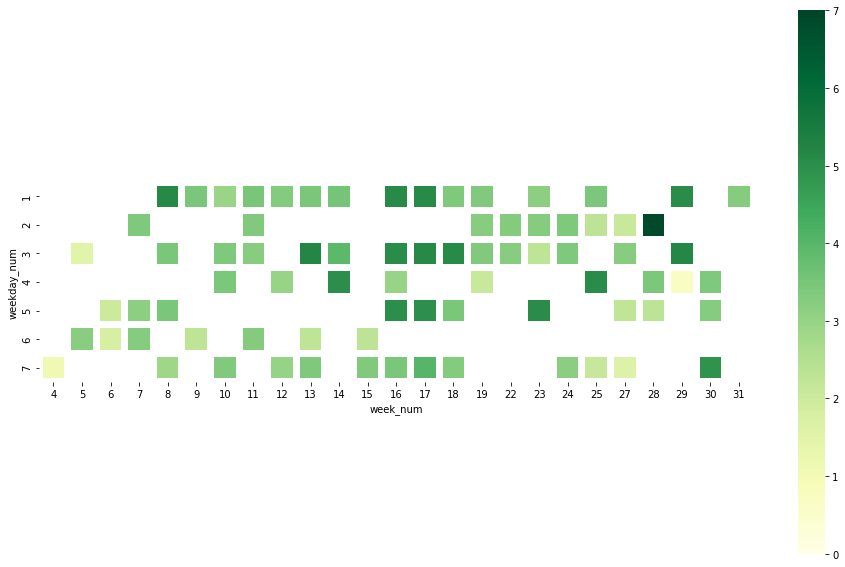

In [115]:
plt.figure(figsize=(16,10))
hm = sns.heatmap(pivoted_data, linewidths=6, vmin=0, vmax=7, cmap='YlGn', linecolor='white', square=True)
hm

In [62]:
df.index[0].isocalendar

,timestamp,fitness_discipline,title,duration,instructor,calories,distance,avg_hr,year,month,weekday
timestamp,,,,,,,,,,,
2021-08-02 18:03:24+00:00,2021-08-02 18:03:24+00:00,running,30 min J Balvin Run,1800,Robin Arzón,315,3.28,169,2021,8,Monday
2021-08-01 15:44:11+00:00,2021-08-01 15:44:11+00:00,running,45 min Endurance Run,2700,Becs Gentry,420,4.92,172,2021,8,Sunday
2021-07-30 17:12:49+00:00,2021-07-30 17:12:49+00:00,running,30 min Tropical House Run,1800,Selena Samuela,334,3.28,173,2021,7,Friday
2021-07-29 13:21:49+00:00,2021-07-29 13:21:49+00:00,running,30 min Intervals Run,1800,Becs Gentry,346,3.39,174,2021,7,Thursday
2021-07-22 18:59:52+00:00,2021-07-22 18:59:52+00:00,running,20 min Intervals Run,1200,Chase Tucker,61,0.66,150,2021,7,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-06 16:20:28+00:00,2021-02-06 16:20:28+00:00,running,30 min Pop Run,1800,Jess Sims,565,3.22,168,2021,2,Saturday
2021-02-03 17:25:54+00:00,2021-02-03 17:25:54+00:00,running,20 min Intervals Run,1200,Olivia Amato,165,1.33,130,2021,2,Wednesday
2021-02-03 16:59:34+00:00,2021-02-03 16:59:34+00:00,running,20 min HIIT Run,1200,Adrian Williams,185,1.67,150,2021,2,Wednesday
